# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.029827e+01     7.504715e+00
 * time: 0.0049610137939453125
     1     2.603528e+01     4.489491e+00
 * time: 0.01473093032836914
     2     1.857773e+01     4.669018e+00
 * time: 0.036540985107421875
     3     1.584906e+01     4.664210e+00
 * time: 0.05862593650817871
     4     1.223901e+01     1.681105e+00
 * time: 0.08082199096679688
     5     1.048770e+01     7.141197e-01
 * time: 0.10336995124816895
     6     1.006822e+01     9.057448e-01
 * time: 0.12119007110595703
     7     9.642703e+00     5.654128e-01
 * time: 0.13910794258117676
     8     9.481640e+00     5.290655e-01
 * time: 0.15692806243896484
     9     9.446886e+00     1.276598e+00
 * time: 0.17073607444763184
    10     9.396194e+00     9.363862e-01
 * time: 0.18424487113952637
    11     9.331939e+00     8.767320e-01
 * time: 0.19732189178466797
    12     9.320474e+00     6.245026e-01
 * time: 0.2104949951171875
    13     9.248494e+00     5.587031e-01
 * tim

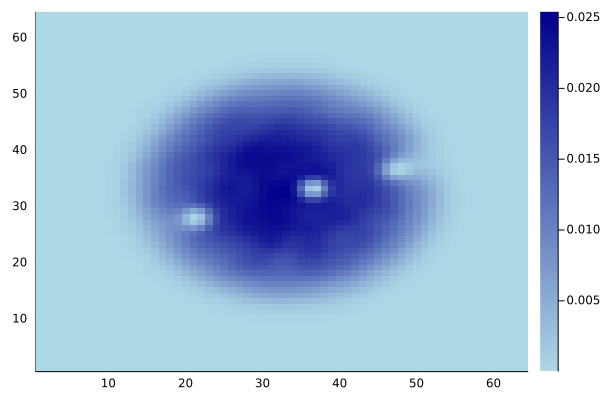

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)